In [17]:
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [38]:
def validate_output(output):
    return (output.loc[range(6,262)]['value'].values.astype(np.int).sum() == 
            float(output.loc[3]['value'])*float(output.loc[4]['value']))

In [39]:
def get_median(nodes, threads, width, height):
    name = ("output_nodes_" + str(nodes) +
            "_threads_" + str(threads) +
            "_width_" + str(width) +
            "_height_" + str(height) + '*')
    
    files = glob.glob(name)
    
    list = []
    for file in files:
        df = pd.read_csv(file, sep=';', names=['parameter','value'])
        
        if not validate_output(df):
            return -1
        
        list.append( np.float(df.loc[0]['value']) )
    
    return np.median(list)

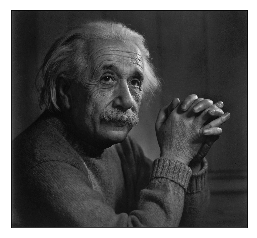

In [18]:
img = cv2.imread('Einstein_3400x3127.jpg',0)
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

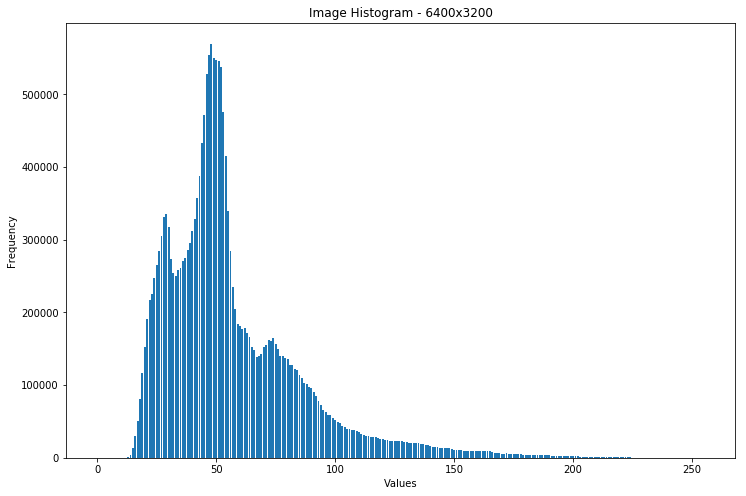

In [37]:
df = pd.read_csv('output_nodes_2_threads_16_width_6400_height_3200_20180404_115430.csv', 
                 sep=';', names=['parameter','value'])

bin_count = df.loc[range(6,262)]['value'].values.astype(np.int)
bins = np.arange(256)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.bar(bins, bin_count)

ax.set_ylabel('Frequency')
ax.set_xlabel('Values')

plt.title('Image Histogram - 6400x3200')

plt.show()

In [40]:
validate_output(df)

True

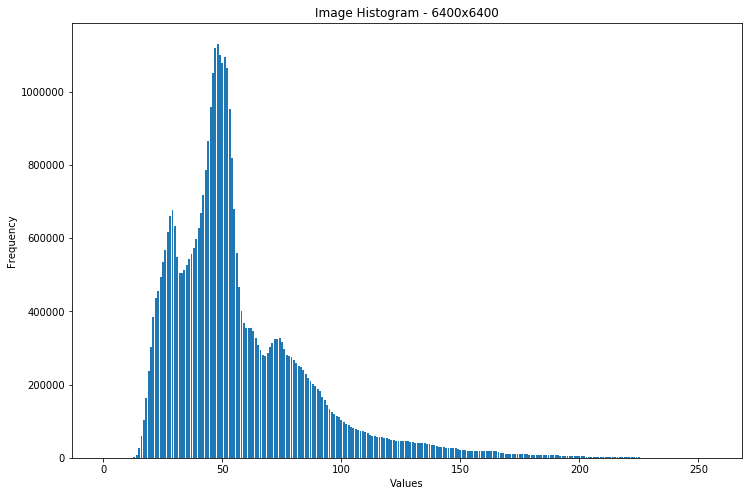

In [44]:
df = pd.read_csv('output_nodes_2_threads_16_width_6400_height_6400_20180404_114820.csv', 
                 sep=';', names=['parameter','value'])

bin_count = df.loc[range(6,262)]['value'].values.astype(np.int)
bins = np.arange(256)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.bar(bins, bin_count)

ax.set_ylabel('Frequency')
ax.set_xlabel('Values')

plt.title('Image Histogram - 6400x6400')

plt.show()

In [43]:
validate_output(df)

True

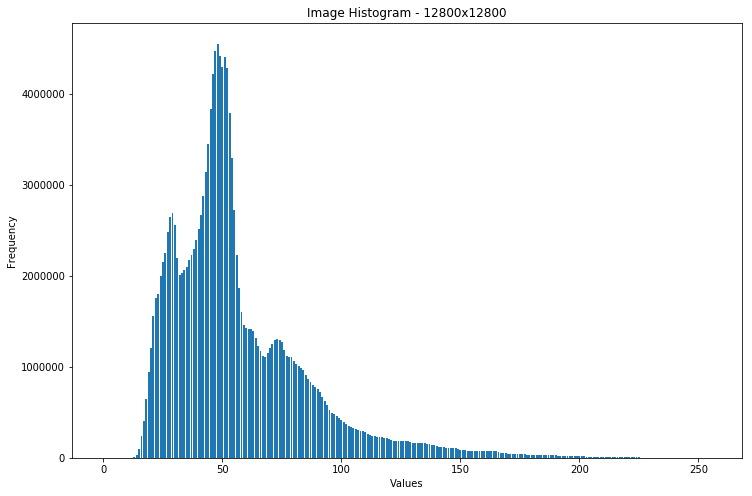

In [45]:
df = pd.read_csv('output_nodes_2_threads_16_width_12800_height_12800_20180404_114819.csv', 
                 sep=';', names=['parameter','value'])

bin_count = df.loc[range(6,262)]['value'].values.astype(np.int)
bins = np.arange(256)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.bar(bins, bin_count)

ax.set_ylabel('Frequency')
ax.set_xlabel('Values')

plt.title('Image Histogram - 12800x12800')

plt.show()

In [46]:
validate_output(df)

True

In [78]:
df = pd.read_csv('output_nodes_1_threads_16_width_3200_height_3200_false_sharing_20180406_011052.csv', 
                 sep=';', names=['parameter','value'])

validate_output(df)

False

In [81]:
pixels = float(df.loc[3]['value'])*float(df.loc[4]['value'])
total_sum = df.loc[range(6,262)]['value'].values.astype(np.int).sum()

print("pixels: ", pixels)
print("sum: ", total_sum)

pixels:  10240000.0
sum:  10035077


In [52]:
columns = ['nodes','threads','cpus','width','height','size','time']

widths = [6400, 12800]
heights = [3200, 6400, 12800]

df = pd.DataFrame(columns=columns)

nodes = [1,2,4,8]
threads = [1,2,4,8]

for node in nodes:
    for thread in threads:
        for width in widths:
            for height in heights:
                time = get_median(node, thread, width, height)
                df = df.append( pd.DataFrame([[node, thread, node*thread, width, height, width*height, time]], 
                                             columns=columns) )

    
nodes = [2,4]
threads = [16,32]

for node in nodes:
    for thread in threads:
        for width in widths:
            for height in heights:
                time = get_median(node, thread, width, height)
                df = df.append( pd.DataFrame([[node, thread, node*thread, width, height, width*height, time]], 
                                             columns=columns) )



/home/pattousai/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pattousai/.local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [53]:
df.dropna(inplace=True)
df.to_csv('dataframe.csv')
df

,nodes,threads,cpus,width,height,size,time
0,1,1,1,6400,3200,20480000,0.017464
0,1,1,1,6400,6400,40960000,0.034755
0,1,1,1,6400,12800,81920000,0.069203
0,1,1,1,12800,12800,163840000,0.154564
0,1,2,2,6400,3200,20480000,0.009175
0,1,2,2,6400,6400,40960000,0.018111
0,1,2,2,6400,12800,81920000,0.035820
0,1,2,2,12800,12800,163840000,0.078305
0,1,4,4,6400,3200,20480000,0.004981
0,1,4,4,6400,6400,40960000,0.009588


In [95]:
df = pd.read_csv('dataframe.csv', index_col=0)
df

,nodes,threads,cpus,width,height,size,time
0,1,1,1,6400,3200,20480000,0.017464
0,1,1,1,6400,6400,40960000,0.034755
0,1,1,1,6400,12800,81920000,0.069203
0,1,1,1,12800,12800,163840000,0.154564
0,1,2,2,6400,3200,20480000,0.009175
0,1,2,2,6400,6400,40960000,0.018111
0,1,2,2,6400,12800,81920000,0.035820
0,1,2,2,12800,12800,163840000,0.078305
0,1,4,4,6400,3200,20480000,0.004981
0,1,4,4,6400,6400,40960000,0.009588


In [94]:
sizes = [20480000, 40960000, 81920000, 163840000]

serial_times = {}
for size in sizes:
    serial_times[size] = df[ (df['size'] == size) & (df['cpus'] == 1) ]['time']


In [ ]:
speedups_mpi = {}

In [76]:
serial_times

{20480000: 0    0.017464
 Name: time, dtype: float64, 40960000: 0    0.034755
 Name: time, dtype: float64, 81920000: 0    0.069203
 Name: time, dtype: float64, 163840000: 0    0.154564
 Name: time, dtype: float64}

In [67]:
np.array([True, False, True, False]) & np.array([False, False, True, False])

array([False, False,  True, False])

In [70]:
list = []
list.append(48)
list.append(5)
list.append(50)
np.median(list)

48.0

In [91]:
get_median(4,1,12800,12800)

[0.0398569, 0.039753, 0.0397089, 0.039783, 0.039808]


0.039783

In [86]:
glob.glob('output_nodes_1_threads_1_width_6400_height_3200*')

['output_nodes_1_threads_1_width_6400_height_3200_20180404_230250.csv',
 'output_nodes_1_threads_1_width_6400_height_3200_20180404_230254.csv',
 'output_nodes_1_threads_1_width_6400_height_3200_20180404_230257.csv',
 'output_nodes_1_threads_1_width_6400_height_3200_20180404_230301.csv',
 'output_nodes_1_threads_1_width_6400_height_3200_20180404_230304.csv']

In [73]:
np.float(file.loc[0]['value'])

0.0092411

In [71]:
file = pd.read_csv('output_nodes_1_threads_2_width_6400_height_3200_20180404_113804.csv', 
                   sep=';', names=['parameter','value'])
file

,parameter,value
0,execution time,0.0092411
1,nodes,1
2,threads,2
3,width,6400
4,height,3200
5,bin,count
6,0,0
7,1,0
8,2,0
9,3,0


In [54]:
file.loc[range(6,262)]['value'].values.astype(np.int).sum()

20480000

In [59]:
float(file.loc[3]['value'])*float(file.loc[4]['value'])

20480000.0

In [60]:
file.loc[range(6,262)]['value'].values.astype(np.int).sum() == float(file.loc[3]['value'])*float(file.loc[4]['value'])

True

In [62]:
validate_output(file)

True

In [30]:
[str(i) for i in range(256)]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'